In [7]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread("hw3Pic.jpg",0)                                    
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)   
dft_shift = np.fft.fftshift(dft)                               
magn = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
magnitude_s = 255*np.log(1+magn)/np.log(np.max(magn))        
dftShift_Magn1 = dft_shift.copy()
dftShift_phase0 = dft_shift.copy()

for y in range(dft_shift.shape[0]):
    for x in range(dft_shift.shape[1]):
        a = dft_shift[y][x][0]
        b = dft_shift[y][x][1]

        theta = math.atan2(b,a)
        dftShift_phase0[y][x][0] = math.cos(theta)
        dftShift_phase0[y][x][1] = math.sin(theta)

        dftShift_Magn1[y][x][0] = math.sqrt(a*a+b*b)
        dftShift_Magn1[y][x][1] = 0

idft = np.fft.ifftshift(dft_shift)
ifimg = cv2.idft(idft)
ifimg = cv2.magnitude(ifimg[:,:,0],ifimg[:,:,1])

idft_phase0 = np.fft.ifftshift(dftShift_phase0)
ifimg_phase0 = cv2.idft(idft_phase0)
ifimg_phase0 = cv2.magnitude(ifimg_phase0[:,:,0],ifimg_phase0[:,:,1])

idft_Magn1 = np.fft.ifftshift(dftShift_Magn1)
ifimg_Magn1 = cv2.idft(idft_Magn1)
magn_Magn1 = cv2.magnitude(ifimg_Magn1[:,:,0],ifimg_Magn1[:,:,1])
ifimg_Magn1 = 255 * np.log(1 + magn_Magn1) / np.log(np.max(magn_Magn1))

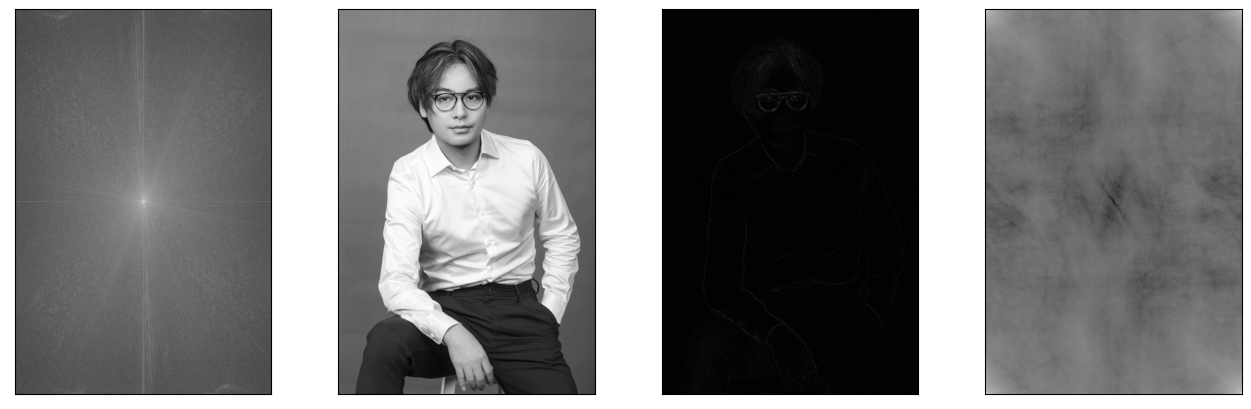

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(141),plt.imshow(magnitude_s, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(ifimg, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(ifimg_phase0, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(ifimg_Magn1, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()